# IS IT DRIVER'S FAULT ?

In [429]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [430]:
df=pd.read_csv('train.csv')
df.shape

(51490, 42)

In [431]:
df.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude,Fault
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,32.895319,1974.545465,39.082783,-77.112688,0.550204
std,11.696668,483.279428,0.072062,0.098300,0.497478
min,0.000000,0.000000,38.008120,-79.486000,0.000000
25%,25.000000,2005.000000,39.023974,-77.188926,0.000000
50%,35.000000,2010.000000,39.074522,-77.105670,1.000000
75%,40.000000,2014.000000,39.139685,-77.040114,1.000000
max,70.000000,9999.000000,39.989747,-75.975952,1.000000


In [432]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Fault
0,MP060D,10196,Montgomery County Police,Injury Crash,06/05/2017 04:27:00 PM,Maryland (State),OLD HUNDRED RD,County,THURSTON RD,12305 SHOREFIELD RD,...,No,No,2005,GMC,TRUCK,NO MISUSE,39.263378,-77.344203,3.6383 7.4233,1
1,MP000X,20080,Montgomery County Police,Injury Crash,02/22/2020 10:00:00 AM,County,JANET RD,County,FLACK ST,NaN,...,No,Yes,2018,FORD,FIESTA,NO MISUSE,39.068913,-77.063227,3.0862 7.324,1
2,MP070N,10103,Montgomery County Police,Property Damage Crash,06/11/2017 08:21:00 AM,Maryland (State),COLESVILLE RD,Maryland (State),STRUC #15082,NaN,...,No,No,2016,NEW FLYER,TBU,NO MISUSE,38.993578,-77.032718,3.9583 7.3783,0
3,MP130Y,10208,Montgomery County Police,Injury Crash,05/10/2019 07:30:00 AM,County,PARKLAND DR,County,FRANKFORT DR,NaN,...,No,No,2001,CHEV,SUBURBAN,OTHER,39.083480,-77.086933,"3.84,-70633",1
4,MP770Y,1091,Montgomery County Police,Injury Crash,08/02/2016 05:00:00 PM,Maryland (State),OLD GEORGETOWN RD,County,MCKINLEY ST,NaN,...,No,No,2013,KIA,RIO,NO MISUSE,38.996942,-77.109168,3.9917 7.0183,0


In [433]:
train_labels=df['Fault']
train_labels

0        1
1        1
2        0
3        1
4        0
        ..
51485    0
51486    1
51487    0
51488    0
51489    0
Name: Fault, Length: 51490, dtype: int64

In [434]:
df=df.drop(columns='Fault')
df

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MP060D,10196,Montgomery County Police,Injury Crash,06/05/2017 04:27:00 PM,Maryland (State),OLD HUNDRED RD,County,THURSTON RD,12305 SHOREFIELD RD,...,40,No,No,2005,GMC,TRUCK,NO MISUSE,39.263378,-77.344203,3.6383 7.4233
1,MP000X,20080,Montgomery County Police,Injury Crash,02/22/2020 10:00:00 AM,County,JANET RD,County,FLACK ST,NaN,...,25,No,Yes,2018,FORD,FIESTA,NO MISUSE,39.068913,-77.063227,3.0862 7.324
2,MP070N,10103,Montgomery County Police,Property Damage Crash,06/11/2017 08:21:00 AM,Maryland (State),COLESVILLE RD,Maryland (State),STRUC #15082,NaN,...,35,No,No,2016,NEW FLYER,TBU,NO MISUSE,38.993578,-77.032718,3.9583 7.3783
3,MP130Y,10208,Montgomery County Police,Injury Crash,05/10/2019 07:30:00 AM,County,PARKLAND DR,County,FRANKFORT DR,NaN,...,25,No,No,2001,CHEV,SUBURBAN,OTHER,39.083480,-77.086933,"3.84,-70633"
4,MP770Y,1091,Montgomery County Police,Injury Crash,08/02/2016 05:00:00 PM,Maryland (State),OLD GEORGETOWN RD,County,MCKINLEY ST,NaN,...,40,No,No,2013,KIA,RIO,NO MISUSE,38.996942,-77.109168,3.9917 7.0183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,MP6308,10034,Montgomery County Police,Injury Crash,02/27/2019 10:58:00 AM,Maryland (State),GEORGIA AVE,County,GOLD MINE RD,NaN,...,40,No,Yes,2001,CAT,IT38H,NO MISUSE,39.175678,-77.058543,3.7683 7.5533
51486,MP2104,20221,Montgomery County Police,Injury Crash,06/29/2020 01:29:00 PM,Maryland (State),FREDERICK RD,County,E GUDE DR,NaN,...,40,No,No,2006,LEXUS,SC430,NO MISUSE,39.105883,-77.157818,3.0833 7.5887
51487,MP240M,1007,Montgomery County Police,Injury Crash,10/04/2016 03:17:00 PM,Maryland (State),FREDERICK RD,County,BRINK RD,NaN,...,30,No,No,2005,PONTIAC,VAN,NO MISUSE,39.191402,-77.266897,3.9417 7.6867
51488,D5102,1034,Rockville Police Departme,Injury Crash,07/05/2016 09:52:00 AM,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,NaN,...,40,No,No,2009,FORD,FLEX,NO MISUSE,39.066993,-77.153778,3.6933 7.5783


# Tried different Data Cleaning and Feature Engineering Methods

In [435]:
# df['Crash Date/Time']=pd.to_datetime(df['Crash Date/Time'])
# data=[df]
# for i in data:
#     i['Year'] = i['Crash Date/Time'].dt.year
#     i['Month'] = i['Crash Date/Time'].dt.month
#     i['Date'] = i['Crash Date/Time'].dt.day
#     i['Day of Week'] = i['Crash Date/Time'].dt.dayofweek
#     i['Hour'] = i['Crash Date/Time'].dt.hour


Tried Information Value Weight of Confidence ( Didn't help )

In [436]:
def woe_iv(temp_df):
    
    temp_df = temp_df.rename(columns = {'count' : 'pops', 'Fault' : 'bads'})
    temp_df['goods'] = temp_df['pops'] - temp_df['bads']
    temp_df['pops_%'] = temp_df['pops']/sum(temp_df['pops'])
    temp_df['goods_%'] = temp_df['goods']/sum(temp_df['goods'])
    temp_df['bads_%'] = temp_df['bads']/sum(temp_df['bads'])
    temp_df['WOE'] = np.log(temp_df['bads_%'] / temp_df['goods_%'])
    temp_df['dif'] = temp_df['bads_%'] - temp_df['goods_%']
    temp_df['IV'] = temp_df['WOE'] * temp_df['dif']

    return temp_df

In [437]:
# woe_iv()
# ivdf = pd.DataFrame()
# for col in df.columns:
#     if col not in  ['Report Number', 'Fault', 'Local Case Number', 'Person ID']:
#         tdf = df.groupby(col).agg({'Report Number':'count', 'Fault':'sum'}).reset_index().rename(columns = {'Report Number':'count', col:'level'}) 
#         tdf = woe_iv(tdf)
#         tdf['feat'] = col
#         print(tdf.columns)
#         ivdf = ivdf.append(tdf, ignore_index = True)
# ivdf.to_csv('analysis.csv')

In [438]:
# binned = pd.cut(df["Speed Limit"], bins = [0,20,40,60,70], labels = ["L","M","H","VH"])
# df["Speed_band"] = binned
# df['Speed_band'] = labelencoder.fit_transform(df['Speed_band'])
# binned1 = pd.cut(df["Vehicle First Impact Location"], bins = [0,5,10,15,20], labels = ["L","M","H","VH"])
# df["Vehicle First Impact Location_band"] = binned1
# df['Vehicle First Impact Location_band'] = labelencoder.fit_transform(df['Vehicle First Impact Location_band'])
# binned1 = pd.cut(df["Surface Condition"], bins = [0,3,6,9,11], labels = ["L","M","H","VH"])
# df["Surface Condition_band"] = binned1
# df['Surface Condition_band'] = labelencoder.fit_transform(df['Surface Condition_band'])

In [439]:
df.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Injury Severity                    object
Circumstance                       object
Drivers License State              object
Vehicle ID                        

In [440]:
df


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MP060D,10196,Montgomery County Police,Injury Crash,06/05/2017 04:27:00 PM,Maryland (State),OLD HUNDRED RD,County,THURSTON RD,12305 SHOREFIELD RD,...,40,No,No,2005,GMC,TRUCK,NO MISUSE,39.263378,-77.344203,3.6383 7.4233
1,MP000X,20080,Montgomery County Police,Injury Crash,02/22/2020 10:00:00 AM,County,JANET RD,County,FLACK ST,NaN,...,25,No,Yes,2018,FORD,FIESTA,NO MISUSE,39.068913,-77.063227,3.0862 7.324
2,MP070N,10103,Montgomery County Police,Property Damage Crash,06/11/2017 08:21:00 AM,Maryland (State),COLESVILLE RD,Maryland (State),STRUC #15082,NaN,...,35,No,No,2016,NEW FLYER,TBU,NO MISUSE,38.993578,-77.032718,3.9583 7.3783
3,MP130Y,10208,Montgomery County Police,Injury Crash,05/10/2019 07:30:00 AM,County,PARKLAND DR,County,FRANKFORT DR,NaN,...,25,No,No,2001,CHEV,SUBURBAN,OTHER,39.083480,-77.086933,"3.84,-70633"
4,MP770Y,1091,Montgomery County Police,Injury Crash,08/02/2016 05:00:00 PM,Maryland (State),OLD GEORGETOWN RD,County,MCKINLEY ST,NaN,...,40,No,No,2013,KIA,RIO,NO MISUSE,38.996942,-77.109168,3.9917 7.0183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,MP6308,10034,Montgomery County Police,Injury Crash,02/27/2019 10:58:00 AM,Maryland (State),GEORGIA AVE,County,GOLD MINE RD,NaN,...,40,No,Yes,2001,CAT,IT38H,NO MISUSE,39.175678,-77.058543,3.7683 7.5533
51486,MP2104,20221,Montgomery County Police,Injury Crash,06/29/2020 01:29:00 PM,Maryland (State),FREDERICK RD,County,E GUDE DR,NaN,...,40,No,No,2006,LEXUS,SC430,NO MISUSE,39.105883,-77.157818,3.0833 7.5887
51487,MP240M,1007,Montgomery County Police,Injury Crash,10/04/2016 03:17:00 PM,Maryland (State),FREDERICK RD,County,BRINK RD,NaN,...,30,No,No,2005,PONTIAC,VAN,NO MISUSE,39.191402,-77.266897,3.9417 7.6867
51488,D5102,1034,Rockville Police Departme,Injury Crash,07/05/2016 09:52:00 AM,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,NaN,...,40,No,No,2009,FORD,FLEX,NO MISUSE,39.066993,-77.153778,3.6933 7.5783


In [441]:
df['Location'].unique()

array(['3.6383 7.4233', '3.0862 7.324', '3.9583 7.3783', ...,
       '3.19,-72003', '3.7683 7.5533', '3.9417 7.6867'], dtype=object)

In [442]:
len(df['Drivers License State'].unique())

66

In [443]:
df.drop('Report Number',inplace=True,axis=1)

In [444]:
df.drop('Local Case Number',inplace=True,axis=1)

In [445]:
df.drop('Vehicle Make',inplace=True,axis=1)

In [446]:
df.drop('Vehicle ID',inplace=True,axis=1)

In [447]:
df.drop('Person ID',inplace=True,axis=1)

In [448]:
df.drop('Circumstance',inplace=True,axis=1)

In [449]:
df.drop('Crash Date/Time',inplace=True,axis=1)

In [450]:
df.drop('Vehicle Model',inplace=True,axis=1)

In [451]:
df.drop('Vehicle Body Type',inplace=True,axis=1)

In [452]:
df.drop('Cross-Street Name',inplace=True,axis=1)

In [453]:
df.drop('Road Name',inplace=True,axis=1)

In [454]:
df.drop('Municipality',inplace=True,axis=1)

In [455]:
df.drop('Off-Road Description',inplace=True,axis=1)

In [456]:
df.drop('Injury Severity',inplace=True,axis=1)

In [457]:
df.drop('Vehicle Damage Extent',inplace=True,axis=1)

In [458]:
df.drop('Weather',inplace=True,axis=1)

In [459]:
df.drop('Cross-Street Type',inplace=True,axis=1)

In [460]:
df.drop('Agency Name',inplace=True,axis=1)

In [461]:
df.drop('ACRS Report Type',inplace=True,axis=1)

In [462]:
df.drop('Non-Motorist Substance Abuse',inplace=True,axis=1)

In [463]:
df.drop('Vehicle Continuing Dir',inplace=True,axis=1)

In [464]:
df.drop('Vehicle Going Dir',inplace=True,axis=1)

In [465]:
df.drop('Latitude',inplace=True,axis=1)

In [466]:
df.drop('Longitude',inplace=True,axis=1)

In [467]:
df.drop('Location',inplace=True,axis=1)
# df.drop('Driverless Vehicle',inplace=True,axis=1)
# df.drop('Related Non-Motorist',inplace=True,axis=1)
# df.drop('Light',inplace=True,axis=1)
# df.drop('Equipment Problems',inplace=True,axis=1)
# df.drop('Traffic Control',inplace=True,axis=1)
# df.drop('Driver Substance Abuse',inplace=True,axis=1)
# df.drop('Parked Vehicle',inplace=True,axis=1)

In [468]:
len(df.columns)

16

In [469]:
df
        

,Route Type,Related Non-Motorist,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Drivers License State,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Equipment Problems
0,Maryland (State),NaN,SINGLE VEHICLE,WET,DAYLIGHT,NO CONTROLS,NONE DETECTED,MD,TWELVE OCLOCK,TWELVE OCLOCK,MOVING CONSTANT SPEED,40,No,No,2005,NO MISUSE
1,County,NaN,STRAIGHT MOVEMENT ANGLE,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,MD,TWELVE OCLOCK,TWELVE OCLOCK,ACCELERATING,25,No,Yes,2018,NO MISUSE
2,Maryland (State),NaN,SAME DIRECTION RIGHT TURN,DRY,UNKNOWN,OTHER,NaN,DC,SIX OCLOCK,SIX OCLOCK,PARKING,35,No,No,2016,NO MISUSE
3,County,NaN,OTHER,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,MD,TWELVE OCLOCK,TWO OCLOCK,MOVING CONSTANT SPEED,25,No,No,2001,OTHER
4,Maryland (State),NaN,SAME DIR REAR END,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MD,SIX OCLOCK,SIX OCLOCK,SLOWING OR STOPPING,40,No,No,2013,NO MISUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,Maryland (State),NaN,SAME DIRECTION LEFT TURN,DRY,DAYLIGHT,NaN,NONE DETECTED,MD,ELEVEN OCLOCK,TWELVE OCLOCK,MAKING LEFT TURN,40,No,Yes,2001,NO MISUSE
51486,Maryland (State),NaN,SAME DIR REAR END,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MD,TWELVE OCLOCK,TWELVE OCLOCK,ACCELERATING,40,No,No,2006,NO MISUSE
51487,Maryland (State),NaN,HEAD ON LEFT TURN,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,MD,TWELVE OCLOCK,TWELVE OCLOCK,MOVING CONSTANT SPEED,30,No,No,2005,NO MISUSE
51488,Municipality,NaN,SAME DIRECTION RIGHT TURN,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MD,TEN OCLOCK,ELEVEN OCLOCK,MOVING CONSTANT SPEED,40,No,No,2009,NO MISUSE


In [470]:
df.isnull().sum() #checking columns which has null 

Route Type                         4968
Related Non-Motorist              47842
Collision Type                      299
Surface Condition                  5879
Light                               704
Traffic Control                    7774
Driver Substance Abuse             9095
Drivers License State              2528
Vehicle First Impact Location       222
Vehicle Second Impact Location      234
Vehicle Movement                    198
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Equipment Problems                10666
dtype: int64

Tried with Mode too 
Mean worked out

In [471]:
# for column in df.columns:
# df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(df['Speed Limit	'], df['fare_amount'])
# plt.show()

Used frequency of distribution to check out about features

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# carrier_count = df['Equipment Problems'].value_counts()
# sns.set(style="darkgrid")
# sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
# plt.title('Frequency Distribution of Carriers')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Carrier', fontsize=12)
# plt.show()

In [472]:
from sklearn.preprocessing import LabelEncoder

In [473]:
labelencoder = LabelEncoder()

In [474]:
df['Route Type'] = labelencoder.fit_transform(df['Route Type'])
df['Route Type']

0        3
1        0
2        3
3        0
4        3
        ..
51485    3
51486    3
51487    3
51488    4
51489    0
Name: Route Type, Length: 51490, dtype: int32

In [475]:
df['Related Non-Motorist'] = labelencoder.fit_transform(df['Related Non-Motorist'])
df['Collision Type'] = labelencoder.fit_transform(df['Collision Type'])
df['Surface Condition'] = labelencoder.fit_transform(df['Surface Condition'])
df['Light'] = labelencoder.fit_transform(df['Light'])
df['Traffic Control'] = labelencoder.fit_transform(df['Traffic Control'])
df['Driver Substance Abuse'] = labelencoder.fit_transform(df['Driver Substance Abuse'])
df['Drivers License State'] = labelencoder.fit_transform(df['Drivers License State'])
df['Vehicle First Impact Location'] = labelencoder.fit_transform(df['Vehicle First Impact Location'])
df['Vehicle Second Impact Location'] = labelencoder.fit_transform(df['Vehicle Second Impact Location'])
df['Vehicle Movement'] = labelencoder.fit_transform(df['Vehicle Movement'])
df['Driverless Vehicle'] = labelencoder.fit_transform(df['Driverless Vehicle'])
df['Parked Vehicle'] = labelencoder.fit_transform(df['Parked Vehicle'])
df['Equipment Problems'] = labelencoder.fit_transform(df['Equipment Problems'])


In [476]:
df.fillna(method ='pad') #Filled all null values with previous one

,Route Type,Related Non-Motorist,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Drivers License State,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Equipment Problems
0,3,11,15,10,4,1,8,25,12,12,9,40,0,0,2005,4
1,0,11,16,0,4,6,8,25,12,12,0,25,0,1,2018,4
2,3,11,13,0,7,2,11,10,9,9,13,35,0,0,2016,4
3,0,11,7,0,4,1,8,25,12,13,9,25,0,0,2001,5
4,3,11,9,0,4,7,8,25,9,9,17,40,0,0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3,11,12,0,4,11,8,25,1,12,6,40,0,1,2001,4
51486,3,11,9,0,4,7,8,25,12,12,0,40,0,0,2006,4
51487,3,11,4,0,4,1,8,25,12,12,9,30,0,0,2005,4
51488,4,11,13,0,4,7,8,25,10,1,9,40,0,0,2009,4


Tried Dropping columns with correlation 

In [477]:
df.corr()

,Route Type,Related Non-Motorist,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Drivers License State,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Equipment Problems
Route Type,1.000000,-0.008456,-0.008434,0.345781,0.021054,0.015413,0.042240,0.077592,-0.023796,-0.020953,-0.048653,-0.350661,0.022016,0.074156,-0.026753,0.071122
Related Non-Motorist,-0.008456,1.000000,-0.014356,0.006384,-0.009163,0.006764,-0.011357,-0.015216,-0.013437,-0.014600,0.016326,0.027616,-0.001812,0.004168,0.013137,-0.001960
Collision Type,-0.008434,-0.014356,1.000000,-0.003719,-0.016215,-0.021390,-0.016613,0.000812,-0.045093,-0.038569,-0.089537,-0.002907,0.005737,-0.021659,-0.010423,-0.029058
Surface Condition,0.345781,0.006384,-0.003719,1.000000,-0.028263,0.006251,0.044638,0.055396,-0.013578,-0.015263,-0.037017,-0.300216,0.017568,0.065191,-0.024954,0.060800
Light,0.021054,-0.009163,-0.016215,-0.028263,1.000000,-0.001508,0.097797,-0.015290,-0.014703,-0.016454,0.037692,-0.036051,0.002014,0.001318,0.006506,0.003925
Traffic Control,0.015413,0.006764,-0.021390,0.006251,-0.001508,1.000000,0.057289,-0.004796,-0.003584,-0.001655,0.028901,0.011485,0.002280,-0.000765,0.004264,0.074920
Driver Substance Abuse,0.042240,-0.011357,-0.016613,0.044638,0.097797,0.057289,1.000000,0.115268,-0.013770,-0.010548,0.023201,-0.027157,0.023616,0.023095,-0.055640,0.140965
Drivers License State,0.077592,-0.015216,0.000812,0.055396,-0.015290,-0.004796,0.115268,1.000000,0.047810,0.045681,-0.023336,-0.081989,0.042173,-0.002818,-0.221808,0.158280
Vehicle First Impact Location,-0.023796,-0.013437,-0.045093,-0.013578,-0.014703,-0.003584,-0.013770,0.047810,1.000000,0.797624,0.063110,0.053887,0.008193,-0.030762,-0.034296,0.010352
Vehicle Second Impact Location,-0.020953,-0.014600,-0.038569,-0.015263,-0.016454,-0.001655,-0.010548,0.045681,0.797624,1.000000,0.064228,0.054153,0.008048,-0.031660,-0.037365,0.015005


In [478]:
df.isnull().sum() #checking columns which has null 

Route Type                        0
Related Non-Motorist              0
Collision Type                    0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Drivers License State             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Movement                  0
Speed Limit                       0
Driverless Vehicle                0
Parked Vehicle                    0
Vehicle Year                      0
Equipment Problems                0
dtype: int64

In [479]:
df.fillna(df.mean())

,Route Type,Related Non-Motorist,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Drivers License State,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Equipment Problems
0,3,11,15,10,4,1,8,25,12,12,9,40,0,0,2005,4
1,0,11,16,0,4,6,8,25,12,12,0,25,0,1,2018,4
2,3,11,13,0,7,2,11,10,9,9,13,35,0,0,2016,4
3,0,11,7,0,4,1,8,25,12,13,9,25,0,0,2001,5
4,3,11,9,0,4,7,8,25,9,9,17,40,0,0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3,11,12,0,4,11,8,25,1,12,6,40,0,1,2001,4
51486,3,11,9,0,4,7,8,25,12,12,0,40,0,0,2006,4
51487,3,11,4,0,4,1,8,25,12,12,9,30,0,0,2005,4
51488,4,11,13,0,4,7,8,25,10,1,9,40,0,0,2009,4


In [480]:
df.isnull().sum() #checking columns which has null ````````

Route Type                        0
Related Non-Motorist              0
Collision Type                    0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Drivers License State             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Movement                  0
Speed Limit                       0
Driverless Vehicle                0
Parked Vehicle                    0
Vehicle Year                      0
Equipment Problems                0
dtype: int64

In [481]:
# df = df.dropna(how='any',axis=0,inplace=True)
# df.shape

In [482]:
# df.drop('WOE',inplace=True,axis=1)
# df.drop('IV',inplace=True,axis=1)

Implemented Chi-square method in Feature Selection

In [483]:
from sklearn.feature_selection import chi2
chi_scores = chi2(df,train_labels)
chi_scores

(array([5.45381127e+02, 7.22405466e+00, 3.70733739e+02, 2.46995972e+03,
        1.91335261e+01, 7.06515980e+01, 1.45137380e+02, 5.96125044e+03,
        1.26975186e+03, 1.24218376e+03, 1.84888146e+04, 3.02420354e+03,
        3.09980632e+00, 2.78971876e+02, 2.45663793e+04, 6.95533992e+01]),
 array([1.27288866e-120, 7.19330436e-003, 1.29549799e-082, 0.00000000e+000,
        1.21884961e-005, 4.26222331e-017, 2.00413220e-033, 0.00000000e+000,
        4.23277870e-278, 4.14688929e-272, 0.00000000e+000, 0.00000000e+000,
        7.83016092e-002, 1.25789282e-062, 0.00000000e+000, 7.43734750e-017]))

In [484]:
p_values = pd.Series(chi_scores[1],index = df.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

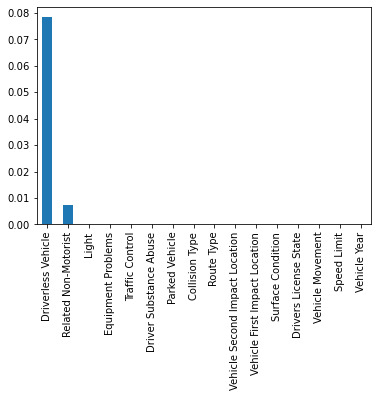

In [485]:
p_values.plot.bar()

In [486]:
df=preprocessing.scale(df)
df.shape

(51490, 16)

Used both Cross validation, train_test_split method to take care of overfitting 

In [487]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, train_labels, test_size=0.20)

In [488]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [489]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [490]:
clf1.score(X_test,y_test)

0.6717809283355991

In [491]:
y_pred=clf1.predict( X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6717809283355991

In [492]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
y_pred1 = clf2.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred1)

0.6210914740726354

In [493]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
clf3.score(X_test, y_test)

0.8257914158088949

In [494]:
clf3.score(X_train,y_train)

0.8269324140609827

In [495]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf3, df , train_labels , cv=5)
print(scores,"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.82656827 0.82336376 0.82384929 0.83132647 0.82530588] Accuracy: 0.83 (+/- 0.01)


In [514]:
from sklearn.ensemble import RandomForestClassifier
# clf4= RandomForestClassifier(bootstrap= True,n_estimators=400, random_state=42,max_features = 7,max_depth=80,min_samples_split=20,min_samples_leaf= 6,criterion='entropy')
clf4= RandomForestClassifier(bootstrap= True,n_estimators=400, random_state=42,max_features = 6,max_depth=88,min_samples_split=20,min_samples_leaf= 6,max_samples=0.9)
# 'bootstrap': True,
#  'max_depth': 80,
#  'max_features': 3,
#  'min_samples_leaf': 5,
#  'min_samples_split': 12,
#  'n_estimators': 100
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
accuracy_score(y_test, y_pred4)

0.8422994756263352

In [497]:
clf4.score(X_train,y_train)

0.8807778209361041

In [498]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf4, df , train_labels , cv=5)
print(scores,"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84560109 0.84132841 0.84589241 0.84919402 0.84647504] Accuracy: 0.85 (+/- 0.01)


In [499]:
clf4.feature_importances_

array([2.37450366e-02, 3.66917914e-03, 1.89057219e-01, 1.30809740e-02,
       1.02388208e-02, 2.98340090e-02, 2.75249791e-02, 3.56878311e-02,
       1.74302510e-01, 1.26797065e-01, 2.78878418e-01, 3.38769530e-02,
       1.65835661e-04, 5.81551200e-03, 3.82887501e-02, 9.03690808e-03])

In [500]:
from sklearn import tree
clf5 = tree.DecisionTreeClassifier()
clf5.fit(X_train,y_train)
y_pred5=clf5.predict(X_test)
accuracy_score(y_test, y_pred)

0.6717809283355991

In [501]:
from sklearn import svm
clf5 =svm.SVC(kernel='linear',C=1).fit(X_train,y_train)
clf5.score(X_test,y_test)

0.6690619537774325

In [502]:
clf5.score(X_train,y_train)

0.6740629248397747

# Done same Data cleaning and Feauture engineeering with Test Set

In [317]:
df1=pd.read_csv('test.csv')
df1.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(77235, 42)

In [318]:
df1.head()

,Id,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,0,MP810M,NaN,MONTGOMERY,Property Damage Crash,12/16/2015 05:42:00 PM,County,WHITTIER BLVD,Maryland (State),WILSON LA,...,25,No,No,2004,LEXUS,RX330,NO MISUSE,38.988440,-77.127668,"3.84,-71763"
1,1,MP2001,NaN,Montgomery County Police,Property Damage Crash,05/01/2016 07:25:00 PM,County,RAILROAD ST,Municipality,E DIAMOND AVE,...,25,No,No,2001,MITSUBISHI,MIRAGE,NO MISUSE,39.094075,-77.205783,3.905 7.0733
2,2,MP6404,10125,Montgomery County Police,Property Damage Crash,03/16/2018 02:30:00 PM,Maryland (State),GEORGIA AVE,County,ARCOLA AVE,...,35,No,No,2016,FRIEGHTLINER,AMBULANCE,NO MISUSE,39.047180,-77.052688,"3.41,-70283"
3,3,MP0405,10270,Montgomery County Police,Property Damage Crash,05/25/2018 05:00:00 PM,NaN,NaN,NaN,NaN,...,25,No,No,2004,FORD,CN,NaN,39.178007,-77.238475,3.7067 7.345
4,4,MP090D,10374,Montgomery County Police,Property Damage Crash,09/23/2017 05:40:00 PM,Interstate (State),EISENHOWER MEMORIAL HWY,Maryland (State),MONTROSE RD,...,55,No,No,2008,UTIL,TL,UNKNOWN,39.056134,-77.154043,3.5143 7.5022


In [319]:
df2=df1
df2

,Id,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,0,MP810M,NaN,MONTGOMERY,Property Damage Crash,12/16/2015 05:42:00 PM,County,WHITTIER BLVD,Maryland (State),WILSON LA,...,25,No,No,2004,LEXUS,RX330,NO MISUSE,38.988440,-77.127668,"3.84,-71763"
1,1,MP2001,NaN,Montgomery County Police,Property Damage Crash,05/01/2016 07:25:00 PM,County,RAILROAD ST,Municipality,E DIAMOND AVE,...,25,No,No,2001,MITSUBISHI,MIRAGE,NO MISUSE,39.094075,-77.205783,3.905 7.0733
2,2,MP6404,10125,Montgomery County Police,Property Damage Crash,03/16/2018 02:30:00 PM,Maryland (State),GEORGIA AVE,County,ARCOLA AVE,...,35,No,No,2016,FRIEGHTLINER,AMBULANCE,NO MISUSE,39.047180,-77.052688,"3.41,-70283"
3,3,MP0405,10270,Montgomery County Police,Property Damage Crash,05/25/2018 05:00:00 PM,NaN,NaN,NaN,NaN,...,25,No,No,2004,FORD,CN,NaN,39.178007,-77.238475,3.7067 7.345
4,4,MP090D,10374,Montgomery County Police,Property Damage Crash,09/23/2017 05:40:00 PM,Interstate (State),EISENHOWER MEMORIAL HWY,Maryland (State),MONTROSE RD,...,55,No,No,2008,UTIL,TL,UNKNOWN,39.056134,-77.154043,3.5143 7.5022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77230,77230,MP9902,10088.0,Montgomery County Police,Injury Crash,02/06/2019 01:55:00 PM,Maryland (State),SPENCERVILLE RD,County,PEACH ORCHARD RD,...,45,No,No,2013,PETERBUILT,REAR LOADER,NO MISUSE,39.116285,-76.963613,3.125 7.6633
77231,77231,MP060M,10672.0,Montgomery County Police,Property Damage Crash,12/23/2019 02:37:00 PM,NaN,NaN,NaN,NaN,...,0,No,No,2003,TOYOTA,TACOMA,NO MISUSE,39.108410,-76.925858,"3.04,-69553"
77232,77232,MP110Z,1050.0,MONTGOMERY,Injury Crash,09/06/2015 07:48:00 PM,County,SHADY GROVE RD,Maryland (State),FREDERICK RD,...,40,No,No,2012,MAZDA,6,NaN,39.122352,-77.177598,3.2317 7.7583
77233,77233,MP9203,10240.0,Montgomery County Police,Property Damage Crash,05/23/2019 11:09:00 AM,Maryland (State),MONTGOMERY AVE,County,WAVERLY ST,...,25,No,No,2015,CADI,XT5,NO MISUSE,38.983770,-77.093128,3.8708 7.9187


In [320]:
df2.dtypes

Id                                  int64
Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Injury Severity                    object
Circumstance                       object
Drivers License State             

In [321]:
df2.drop('Report Number',inplace=True,axis=1)
df2.drop('Local Case Number',inplace=True,axis=1)
df2.drop('Agency Name',inplace=True,axis=1)
df2.drop('ACRS Report Type',inplace=True,axis=1)
df2.drop('Crash Date/Time',inplace=True,axis=1)
df2.drop('Road Name',inplace=True,axis=1)
df2.drop('Cross-Street Type',inplace=True,axis=1)
df2.drop('Cross-Street Name',inplace=True,axis=1)
df2.drop('Off-Road Description',inplace=True,axis=1)
df2.drop('Municipality',inplace=True,axis=1)
df2.drop('Weather',inplace=True,axis=1)
df2.drop('Non-Motorist Substance Abuse',inplace=True,axis=1)
df2.drop('Person ID',inplace=True,axis=1)
df2.drop('Injury Severity',inplace=True,axis=1)
df2.drop('Circumstance',inplace=True,axis=1)
df2.drop('Vehicle ID',inplace=True,axis=1)
df2.drop('Vehicle Damage Extent',inplace=True,axis=1)
df2.drop('Vehicle Body Type',inplace=True,axis=1)
df2.drop('Vehicle Continuing Dir',inplace=True,axis=1)
df2.drop('Vehicle Going Dir',inplace=True,axis=1)
df2.drop('Vehicle Make',inplace=True,axis=1)
df2.drop('Vehicle Model',inplace=True,axis=1)
df2.drop('Latitude',inplace=True,axis=1)
df2.drop('Longitude',inplace=True,axis=1)
df2.drop('Location',inplace=True,axis=1)
# df2.drop('Driverless Vehicle',inplace=True,axis=1)
# df2.drop('Related Non-Motorist',inplace=True,axis=1)
# df2.drop('Light',inplace=True,axis=1)
# df2.drop('Equipment Problems',inplace=True,axis=1)
# df2.drop('Traffic Control',inplace=True,axis=1)
# df2.drop('Parked Vehicle',inplace=True,axis=1)
# df2.drop('Driver Substance Abuse',inplace=True,axis=1)

In [322]:
df2.drop('Id',inplace=True,axis=1)
df2

,Route Type,Related Non-Motorist,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Drivers License State,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Movement,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Equipment Problems
0,County,NaN,OTHER,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL CONTRIBUTED,MD,ELEVEN OCLOCK,ELEVEN OCLOCK,MAKING RIGHT TURN,25,No,No,2004,NO MISUSE
1,County,NaN,SAME DIR REAR END,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MD,SIX OCLOCK,SIX OCLOCK,STOPPED IN TRAFFIC LANE,25,No,No,2001,NO MISUSE
2,Maryland (State),NaN,SAME DIRECTION SIDESWIPE,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MD,TWO OCLOCK,TWO OCLOCK,MOVING CONSTANT SPEED,35,No,No,2016,NO MISUSE
3,NaN,NaN,SAME DIRECTION SIDESWIPE,NaN,DAYLIGHT,NO CONTROLS,NaN,MD,TWELVE OCLOCK,TWELVE OCLOCK,ACCELERATING,25,No,No,2004,NaN
4,Interstate (State),NaN,OTHER,DRY,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,NINE OCLOCK,NINE OCLOCK,CHANGING LANES,55,No,No,2008,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77230,Maryland (State),NaN,HEAD ON,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,MD,TWELVE OCLOCK,TWELVE OCLOCK,MOVING CONSTANT SPEED,45,No,No,2013,NO MISUSE
77231,NaN,NaN,STRAIGHT MOVEMENT ANGLE,NaN,DAYLIGHT,NaN,NONE DETECTED,DC,FOUR OCLOCK,FOUR OCLOCK,OTHER,0,No,No,2003,NO MISUSE
77232,County,NaN,SAME DIR REAR END,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,MD,SIX OCLOCK,SIX OCLOCK,SLOWING OR STOPPING,40,No,No,2012,NaN
77233,Maryland (State),NaN,SAME DIRECTION LEFT TURN,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,MD,ELEVEN OCLOCK,ELEVEN OCLOCK,MAKING LEFT TURN,25,No,No,2015,NO MISUSE


In [323]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['Route Type'] = labelencoder.fit_transform(df2['Route Type'])
df2['Related Non-Motorist'] = labelencoder.fit_transform(df2['Related Non-Motorist'])
df2['Collision Type'] = labelencoder.fit_transform(df2['Collision Type'])
df2['Surface Condition'] = labelencoder.fit_transform(df2['Surface Condition'])
df2['Light'] = labelencoder.fit_transform(df2['Light'])
df2['Traffic Control'] = labelencoder.fit_transform(df2['Traffic Control'])
df2['Driver Substance Abuse'] = labelencoder.fit_transform(df2['Driver Substance Abuse'])
df2['Drivers License State'] = labelencoder.fit_transform(df2['Drivers License State'])
df2['Vehicle First Impact Location'] = labelencoder.fit_transform(df2['Vehicle First Impact Location'])
df2['Vehicle Second Impact Location'] = labelencoder.fit_transform(df2['Vehicle Second Impact Location'])
df2['Vehicle Movement'] = labelencoder.fit_transform(df2['Vehicle Movement'])
df2['Driverless Vehicle'] = labelencoder.fit_transform(df2['Driverless Vehicle'])
df2['Parked Vehicle'] = labelencoder.fit_transform(df2['Parked Vehicle'])
df2['Equipment Problems'] = labelencoder.fit_transform(df2['Equipment Problems'])

In [324]:
df2.shape

(77235, 16)

In [325]:
df2=preprocessing.scale(df2)
df2.shape[0]

77235

In [326]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df2 = sc.fit_transform(df2)


In [327]:
Fault=clf3.predict(df2)

In [328]:
Fault

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [329]:
ndf=pd.read_csv('test.csv')
ndf1=ndf.iloc[:,[0]]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [330]:
ndf1['Fault']=Fault
ndf1

<ipython-input-330-303f31ec09ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf1['Fault']=Fault


,Id,Fault
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
77230,77230,0
77231,77231,0
77232,77232,0
77233,77233,1


In [331]:
ndf1.to_csv('SM21MTECH12012.csv')

In [332]:
Fault1=clf4.predict(df2)
ndf2=ndf.iloc[:,[0]]
ndf2['Fault']=Fault1
ndf2

<ipython-input-332-0bfbfa24f688>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['Fault']=Fault1


,Id,Fault
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
77230,77230,0
77231,77231,0
77232,77232,0
77233,77233,1


In [333]:
ndf2.to_csv('SM21MTECH12012.csv')